<a href="https://colab.research.google.com/github/maitri2905/COVID_VACCINATIONS/blob/main/Term_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **COVID-19 Worldwide UPDATES**

In [40]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [41]:
import numpy as np 
import pandas as pd 
from datetime import datetime
import os
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

vaccine = pd.read_csv('/content/gdrive/My Drive/VACCINATIONS/country_vaccinations.csv')
vaccine['date_new'] = pd.to_datetime(vaccine['date'])
covid=pd.read_csv('/content/gdrive/My Drive/VACCINATIONS/worldometer_coronavirus_daily_data.csv')
covid_sum=pd.read_csv('/content/gdrive/My Drive/VACCINATIONS/worldometer_coronavirus_summary_data.csv')
covid['date_new'] = pd.to_datetime(covid['date'])

In [42]:
fig = go.Figure(data=go.Choropleth(locations = covid_sum['country'],
                            locationmode='country names',
                            z = covid_sum['total_confirmed'],
                            text = covid_sum['country'],
#                             color_continuous_scale='reds',
                            colorscale = 'RdBu',
                            autocolorscale=False,
#                             reversescale=True,
                            marker_line_color='black',
                            marker_line_width=0.5,
                        
                          ))

fig.update_layout(
    title_text='Total confirmed cases around the world',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='orthographic'
    ))
fig.show()

In [43]:
covid_sum_top_10 = covid_sum[['country','total_confirmed']].sort_values('total_confirmed')[-10:]
fig = go.Figure(go.Bar(
            x=covid_sum_top_10['total_confirmed'],
            y=covid_sum_top_10['country'],
    marker_color = ['MediumPurple']* 10,
    text = covid_sum_top_10['total_confirmed'],
            orientation='h')
               ,layout=go.Layout(height=500, width=700))
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(title_text='Top 10 countries by total confirmed case',xaxis_title='total confirmed cases')
fig.show()

In [44]:
color_dict={'Europe':'lightpink','North America':'lightsalmon','Asia':'orchid','South America':'papayawhip','Africa':'deeppink','Australia/Oceania':'plum'}

covid_sum_top_20_normalised = covid_sum[['country','total_cases_per_1m_population','continent']].sort_values('total_cases_per_1m_population')[-20:]
color_list = [color_dict[x] for x in covid_sum_top_20_normalised['continent'].values]
fig = go.Figure(go.Bar(
            x=covid_sum_top_20_normalised['total_cases_per_1m_population'],
            y=covid_sum_top_20_normalised['country'],
             marker_color = color_list,
             text=covid_sum_top_20_normalised['total_cases_per_1m_population'],
            orientation='h')
               ,layout=go.Layout(height=500, width=700))
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(title_text='Top 20 countries by total cases per 1 million population',xaxis_title='total cases per 1m population')
fig.show()

In [45]:
covid_sum_top_20_deaths = covid_sum[['country','total_deaths_per_1m_population','continent']].dropna().sort_values('total_deaths_per_1m_population')[-20:]
color_list = [color_dict[x] for x in covid_sum_top_20_deaths['continent'].values]
fig = go.Figure(go.Bar(
            x=covid_sum_top_20_deaths['total_deaths_per_1m_population'],
            y=covid_sum_top_20_deaths['country'],
            text=covid_sum_top_20_deaths['total_deaths_per_1m_population'],
             marker_color= color_list,
            orientation='h')
               ,layout=go.Layout(height=500, width=700))
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(title_text='Top 20 countries by total deaths per 1 million population',xaxis_title='total deaths per 1m population')

fig.show()

In [46]:
covid_sum_top_20_tests = covid_sum[['country','total_tests_per_1m_population','continent']].dropna().sort_values('total_tests_per_1m_population')[-20:]
color_list = [color_dict[x] for x in covid_sum_top_20_tests['continent'].values]
fig = go.Figure(go.Bar(
            x=covid_sum_top_20_tests['total_tests_per_1m_population'],
            y=covid_sum_top_20_tests['country'],
            text=covid_sum_top_20_tests['total_tests_per_1m_population'],
             marker_color= color_list,
    orientation='h'),layout=go.Layout(height=500, width=700))
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(title_text='Top 20 countries by total tests per 1 million population',xaxis_title='total tests per 1m population')

fig.show()

In [47]:
world_cum=pd.DataFrame(covid.groupby('date')['daily_new_cases'].sum())
world_cum = world_cum.reset_index()
fig = px.bar(world_cum, x='date', y='daily_new_cases',width=700, height=400)
fig.show()

In [48]:
country_daily_cum = pd.DataFrame(covid.groupby(['date_new','country'])['daily_new_cases'].sum())
country_daily_cum = country_daily_cum.reset_index()
top_5_countries = ['USA','India','Brazil','China','France']
only_top=country_daily_cum[country_daily_cum['country'].isin(top_5_countries)]
fig = px.line(only_top, x="date_new", y="daily_new_cases",color='country',width=800, height=400)
fig.show()

# Second Wave in USA

In [49]:
USA = covid[covid['country']=='USA']
fig = px.bar(USA, x='date', y='daily_new_cases',title='Daily new cases from Apr 2020 to Apr 2021',width=700, height=400)
fig.show()

In [50]:
USA = covid[covid['country']=='USA']
vaccine_USA=vaccine[vaccine['country']=='United States']
fig = make_subplots(rows=3, cols=1,subplot_titles=('Active Cases','Daily New Deaths','Daily vaccinations'))
# fig.add_trace(go.Bar(x=USA['date'].values, y=USA['daily_new_cases'].values),
#               row=1, col=1)

fig.add_trace(go.Bar(x=USA['date'].values, y=USA['active_cases'].values,showlegend=False),
              row=1, col=1)

fig.add_trace(go.Bar(x=USA['date'].values, y=USA['daily_new_deaths'].values,showlegend=False),
              row=2, col=1)

fig.add_trace(go.Bar(x=vaccine_USA['date'].values, y=vaccine_USA['daily_vaccinations'].values, showlegend= False),
              row=3, col=1)
fig.update_layout(height=800, width=700)
fig.show()

# Second wave in India

In [51]:
india = covid[covid['country']=='India']
fig = px.bar(india, x='date', y='daily_new_cases',title='Daily new cases from Apr 2020 to Apr 2021',width=700, height=400)
fig.show()

In [52]:
india = covid[covid['country']=='India']
vaccine_ind=vaccine[vaccine['country']=='India']
fig = make_subplots(rows=3, cols=1,subplot_titles=('Active Cases','Daily New Deaths','Daily vaccinations'))
# fig.add_trace(go.Bar(x=india['date'].values, y=india['daily_new_cases'].values),
#               row=1, col=1)

fig.add_trace(go.Bar(x=india['date'].values, y=india['active_cases'].values,showlegend=False),
              row=1, col=1)

fig.add_trace(go.Bar(x=india['date'].values, y=india['daily_new_deaths'].values,showlegend=False),
              row=2, col=1)

fig.add_trace(go.Bar(x=vaccine_ind['date'].values, y=vaccine_ind['daily_vaccinations'].values, showlegend= False),
              row=3, col=1)
fig.update_layout(height=800, width=700)
fig.show()


In [53]:
figure= go.Figure()
fig = go.Figure(go.Bar(
            x=[covid_sum[covid_sum['country']=='USA']['total_deaths_per_1m_population'].values[0],covid_sum[covid_sum['country']=='India']['total_deaths_per_1m_population'].values[0]],
            y=['USA','India'],
            orientation='h'),layout=go.Layout(height=400, width=600))
fig.update_layout(title_text='USA vs India: Mortality Comparison',xaxis_title='total deaths per 1m population')

           

fig.show()

In [54]:
fig = make_subplots(rows=2, cols=1,subplot_titles=('People Vaccinated per hundred','People fully vaccinated per hundred'))
fig.add_trace(go.Scatter(x=vaccine_USA['date'].values, y=vaccine_USA['people_vaccinated_per_hundred'].values, fill='tozeroy',
                    mode='none',name='United States' 
                    ),1,1)
fig.add_trace(go.Scatter(x=vaccine_ind['date'].values, y=vaccine_ind['people_vaccinated_per_hundred'].values, fill='tozeroy',
                    mode= 'none',name = 'India'),1,1)
fig.add_trace(go.Scatter(x=vaccine_USA['date'].values, y=vaccine_USA['people_fully_vaccinated_per_hundred'].values, fill='tozeroy',
                    mode='none',name='Unites States' 
                    ),2,1)
fig.add_trace(go.Scatter(x=vaccine_ind['date'].values, y=vaccine_ind['people_fully_vaccinated_per_hundred'].values, fill='tozeroy',
                    mode= 'none',name = 'India'),2,1)
fig.update_layout(height=500, width=700)

fig.show()

# Second Wave in European Countries

In [55]:
france = covid[covid['country']=='France']
germany = covid[covid['country']=='Germany']
portugal = covid[covid['country']=='Portugal']
turkey = covid[covid['country']=='Turkey']
uk = covid[covid['country']=='UK']
fig = make_subplots(rows=5, cols=1,subplot_titles=('France','Germany','UK','Portugal','Turkey'))

fig.add_trace(go.Bar(x=france['date'].values, y=france['daily_new_cases'].values,name='France'),
              row=1, col=1)

fig.add_trace(go.Bar(x=germany['date'].values, y=germany['daily_new_cases'].values,name='Germany'),
              row=2, col=1)

fig.add_trace(go.Bar(x=uk['date'].values, y=uk['daily_new_cases'].values,name='UK'), row=3, col=1)

fig.add_trace(go.Bar(x=portugal['date'].values, y=portugal['daily_new_cases'].values,name='Portugal'),
              row=4, col=1)

fig.add_trace(go.Bar(x=turkey['date'].values, y=turkey['daily_new_cases'].values,name='Turkey'),
              row=5, col=1)

             
fig.update_layout(height=1200, width=700)
fig.show()

In [56]:
# france = covid[covid['country']=='France']
# germany = covid[covid['country']=='Germany']
# portugal = covid[covid['country']=='Portugal']
# turkey = covid[covid['country']=='Turkey']
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Scatter(x=france['date'].values, y=france['daily_new_deaths'].values,name='France'),
              row=1, col=1)

fig.add_trace(go.Scatter(x=germany['date'].values, y=germany['daily_new_deaths'].values,name='Germany'),
              row=1, col=1)

fig.add_trace(go.Scatter(x=portugal['date'].values, y=portugal['daily_new_deaths'].values,name='Portugal'),
              row=1, col=1)

fig.add_trace(go.Scatter(x=turkey['date'].values, y=turkey['daily_new_deaths'].values,name='Turkey'),
              row=1, col=1)
fig.add_trace(go.Scatter(x=uk['date'].values, y=uk['daily_new_deaths'].values,name='UK'),
              row=1, col=1)
fig.update_layout(height=500, width=800,title_text='Daily new deaths for European Countries')
fig.show()


In [57]:
countries= ['France','Germany','Portugal','Turkey','UK']
europe_mortality=covid_sum[covid_sum['country'].isin(countries)].sort_values('total_deaths_per_1m_population')
fig = go.Figure(go.Bar(
            x=europe_mortality['total_deaths_per_1m_population'],
            y=europe_mortality['country'],
            orientation='h')
               ,layout=go.Layout(height=400, width=700))
fig.update_layout(title_text='Mortality rate- European countries',xaxis_title='total deaths per 1m population')

In [58]:
france = vaccine[vaccine['country']=='France']
germany = vaccine[vaccine['country']=='Germany']
portugal = vaccine[vaccine['country']=='Portugal']
turkey = vaccine[vaccine['country']=='Turkey']
uk = vaccine[vaccine['country']=='United Kingdom']
fig = make_subplots(rows=2, cols=1,subplot_titles=('People Vaccinated per hundred','People Fully vaccinated per hundred'))

fig.add_trace(go.Scatter(x=france['date'].values, y=france['people_vaccinated_per_hundred'].values,name='France'),
              row=1, col=1)

fig.add_trace(go.Scatter(x=germany['date'].values, y=germany['people_vaccinated_per_hundred'].values,name='Germany'),
              row=1, col=1)

fig.add_trace(go.Scatter(x=portugal['date'].values, y=portugal['people_vaccinated_per_hundred'].values,name='Portugal'),
              row=1, col=1)

fig.add_trace(go.Scatter(x=turkey['date'].values, y=turkey['people_vaccinated_per_hundred'].values,name='Turkey'),
              row=1, col=1)
fig.add_trace(go.Scatter(x=uk['date'].values, y=uk['people_vaccinated_per_hundred'].values,name='UK'),
              row=1, col=1)

fig.add_trace(go.Scatter(x=france['date'].values, y=france['people_fully_vaccinated_per_hundred'].values,name='France'),
              row=2, col=1)

fig.add_trace(go.Scatter(x=germany['date'].values, y=germany['people_fully_vaccinated_per_hundred'].values,name='Germany'),
              row=2, col=1)

fig.add_trace(go.Scatter(x=portugal['date'].values, y=portugal['people_fully_vaccinated_per_hundred'].values,name='Portugal'),
              row=2, col=1)

fig.add_trace(go.Scatter(x=turkey['date'].values, y=turkey['people_fully_vaccinated_per_hundred'].values,name='Turkey'),
              row=2, col=1)
fig.add_trace(go.Scatter(x=uk['date'].values, y=uk['people_fully_vaccinated_per_hundred'].values,name='UK'),
              row=2, col=1)
fig.update_layout(height=800, width=700)
fig.show()

# **Visualizing **

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
from folium import plugins

In [60]:
daily = vaccine.groupby('date').sum()['daily_vaccinations'].reset_index()
total = vaccine.groupby('date').sum()['total_vaccinations'].reset_index()
fully = vaccine.groupby('date').sum()['people_fully_vaccinated'].reset_index()

# **Forecasting **

In [61]:
from fbprophet import Prophet

In [62]:
daily = vaccine.groupby('date').sum()['daily_vaccinations'].reset_index()
total = vaccine.groupby('date').sum()['total_vaccinations'].reset_index()
fully = vaccine.groupby('date').sum()['people_fully_vaccinated'].reset_index()

In [63]:
daily.columns = ['ds', 'y']
daily['ds']= pd.to_datetime(daily['ds'])

In [64]:
daily.tail()

,ds,y
132,2021-04-05,16489767.0
133,2021-04-06,16800317.0
134,2021-04-07,16890170.0
135,2021-04-08,17081967.0
136,2021-04-09,17307178.0


Forecasting the Daily Vaccinations Worldwide with Prophet

In [65]:
m = Prophet(interval_width=0.95)
m.fit(daily)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
139,2021-05-02
140,2021-05-03
141,2021-05-04
142,2021-05-05
143,2021-05-06


Predicting the future with date, adn upper limit and lower limit of y value

In [66]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
139,2021-05-02,1.974041e+07,1.776982e+07,2.161562e+07
140,2021-05-03,1.993532e+07,1.808973e+07,2.185786e+07
141,2021-05-04,2.009499e+07,1.815937e+07,2.197967e+07
142,2021-05-05,2.029207e+07,1.851764e+07,2.215988e+07
143,2021-05-06,2.035332e+07,1.835244e+07,2.217792e+07


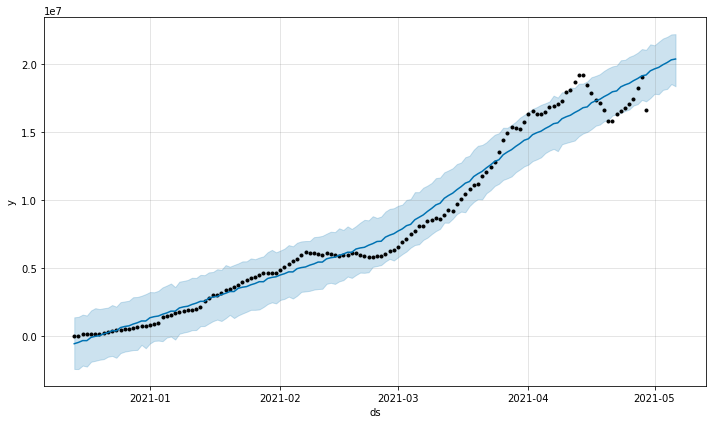

In [67]:
daily_forecast_plot = m.plot(forecast)

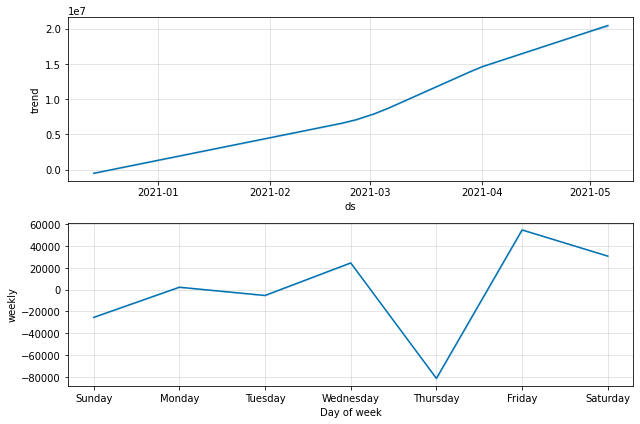

In [68]:
daily_forecast_plot = m.plot_components(forecast)

In [69]:
total.columns = ['ds', 'y']
total['ds']= pd.to_datetime(total['ds'])

In [70]:
total.tail()

,ds,y
132,2021-04-05,690337028.0
133,2021-04-06,707930926.0
134,2021-04-07,724334038.0
135,2021-04-08,757587505.0
136,2021-04-09,754786395.0


Forecasting the Total Vaccinations Worldwide with Prophet

In [71]:
m = Prophet(interval_width=0.95)
m.fit(total)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
139,2021-05-02
140,2021-05-03
141,2021-05-04
142,2021-05-05
143,2021-05-06


Predicting the future with date, adn upper limit and lower limit of y value

In [72]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
139,2021-05-02,1.104717e+09,1.050251e+09,1.157714e+09
140,2021-05-03,1.120010e+09,1.067689e+09,1.174192e+09
141,2021-05-04,1.135241e+09,1.083653e+09,1.186311e+09
142,2021-05-05,1.161837e+09,1.108649e+09,1.211779e+09
143,2021-05-06,1.163451e+09,1.105620e+09,1.220163e+09


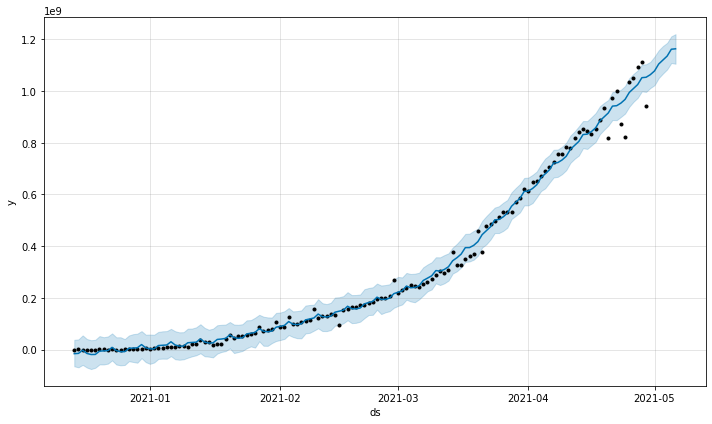

In [73]:
total_forecast_plot = m.plot(forecast)

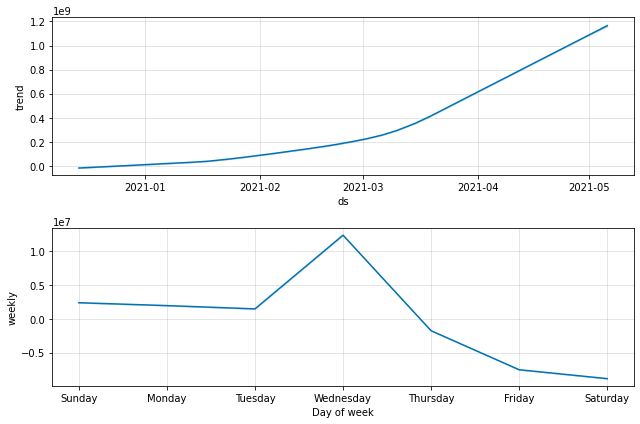

In [74]:
total_forecast_plot = m.plot_components(forecast)

In [75]:
fully.columns = ['ds', 'y']
fully['ds']= pd.to_datetime(fully['ds'])

In [76]:
fully.tail()

,ds,y
132,2021-04-05,144363918.0
133,2021-04-06,150294691.0
134,2021-04-07,152303352.0
135,2021-04-08,160514670.0
136,2021-04-09,160111881.0


Forecasting the Fully Vaccinations Worldwide with Prophet

In [77]:
m = Prophet(interval_width=0.95)
m.fit(fully)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
139,2021-05-02
140,2021-05-03
141,2021-05-04
142,2021-05-05
143,2021-05-06


Predicting the future with date, adn upper limit and lower limit of y value

In [78]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
139,2021-05-02,2.536338e+08,2.424998e+08,2.640373e+08
140,2021-05-03,2.588160e+08,2.485006e+08,2.698452e+08
141,2021-05-04,2.633683e+08,2.535547e+08,2.731769e+08
142,2021-05-05,2.686440e+08,2.585081e+08,2.787104e+08
143,2021-05-06,2.696284e+08,2.591218e+08,2.802218e+08


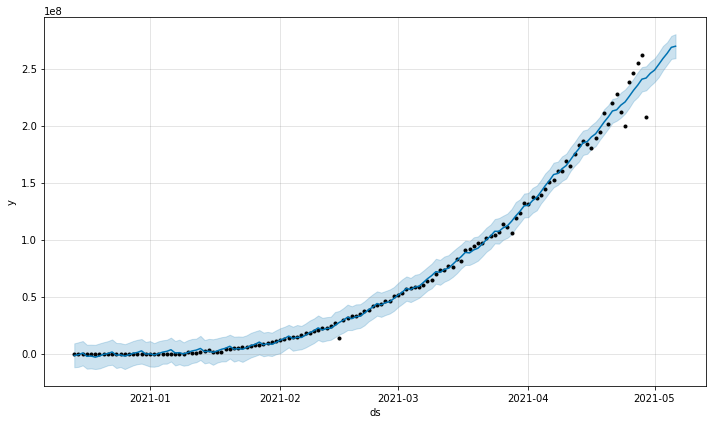

In [79]:
fully_forecast_plot = m.plot(forecast)

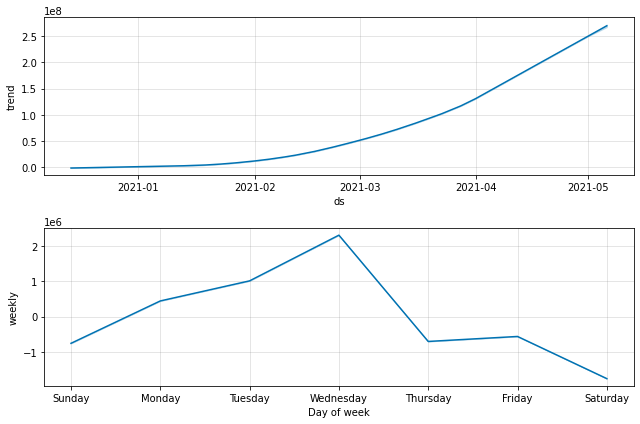

In [80]:
fully_forecast_plot = m.plot_components(forecast)